In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/Users/ocksumoron/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [14]:
types = pd.read_csv('tr_types.csv', sep=';')
mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
customers_gender_train = pd.read_csv('customers_gender_train.csv', sep=',')
transactions = pd.read_csv('transactions.csv')

In [3]:
customers = pd.DataFrame()
train_len = customers_gender_train.shape[0]

In [4]:
all_customers = transactions['customer_id'].unique()
train_customers_id = np.array(customers_gender_train['customer_id'])
is_train_customer = pd.Series([customer in train_customers_id for customer in all_customers])
train_gender = pd.Series(customers_gender_train['gender'])
test_customers_id = pd.Series([c_id for c_id in all_customers if c_id not in train_customers_id])

In [11]:
tmp = {'customer_id': all_customers,
      'is_train': is_train_customer}
customers = pd.DataFrame(data=tmp)

In [51]:
%%time
def gen_tr_type_features(customer_id):
    good_transactions = (transactions['customer_id'] == customer_id)
    tr_types_for_customer = transactions[good_transactions].groupby(by='tr_type').groups
    generated_raw = {'tr_type_' + str(tr_type): len(tr_types_for_customer[tr_type]) \
                     if tr_type in tr_types_for_customer else 0 \
                    for tr_type in types['tr_type']}
    return pd.Series(generated_raw)
customers = pd.concat([customers, \
                       customers['customer_id'].apply(lambda customer_id: \
                                                      gen_tr_type_features(customer_id))], \
                      axis=1)

CPU times: user 2min 27s, sys: 17.2 s, total: 2min 44s
Wall time: 2min 46s


In [57]:
customers = customers.loc[:, (customers != 0).any(axis=0)]

In [59]:
customers.to_csv('customers_tr_type.csv')

In [65]:
%%time
def gen_mcc_code_features(customer_id):
    good_transactions = (transactions['customer_id'] == customer_id)
    mcc_codes_for_customer = transactions[good_transactions].groupby(by='mcc_code').groups
    generated_raw = {'mcc_code_' + str(mcc_code): len(mcc_codes_for_customer[mcc_code]) \
                     if mcc_code in mcc_codes_for_customer else 0 \
                    for mcc_code in mcc_codes['mcc_code']}
    return pd.Series(generated_raw)
customers = pd.concat([customers, \
                       customers['customer_id'].apply(lambda customer_id: \
                                                      gen_mcc_code_features(customer_id))], \
                      axis=1)

CPU times: user 2min 25s, sys: 17 s, total: 2min 42s
Wall time: 2min 44s


In [67]:
customers = customers.loc[:, (customers != 0).any(axis=0)]

In [69]:
customers.to_csv('customers_tr_type_mcc_codes.csv')

In [4]:
customers = pd.read_csv('customers_tr_type_mcc_codes.csv')

In [5]:
customers

,Unnamed: 0,customer_id,is_train,tr_type_1000,tr_type_1010,tr_type_1030,tr_type_1100,tr_type_1110,tr_type_1200,tr_type_1210,...,mcc_code_8299,mcc_code_8398,mcc_code_8641,mcc_code_8699,mcc_code_8999,mcc_code_9211,mcc_code_9222,mcc_code_9311,mcc_code_9399,mcc_code_9402
0,0,39026145,True,0,537,137,1,192,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,52220754,True,0,267,36,0,135,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,78029866,False,0,508,62,0,117,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,79780256,True,0,0,46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1585299,True,0,480,42,19,106,0,0,...,0,0,0,0,8,0,0,0,0,0
5,5,1645333,True,0,140,94,0,8,0,0,...,0,0,0,0,1,0,0,0,0,0
6,6,5524414,True,0,31,40,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,35059129,True,0,526,101,19,155,1,0,...,0,0,0,0,17,0,0,0,0,0
8,8,64627292,True,0,47,9,0,18,0,0,...,0,0,0,0,1,0,0,0,0,0
9,9,3765322,True,0,102,68,97,121,17,5,...,1,0,0,0,0,0,0,0,1,0


In [85]:
good_transactions = (transactions['customer_id'] == 39026145)
amounts = transactions[good_transactions]['amount']
np.max(amounts[amounts < 0])

-44.920000000000002

In [91]:
np.size([0, 1])

2

In [94]:
%%time
def gen_amount_features(customer_id):
    good_transactions = (transactions['customer_id'] == customer_id)
    amounts = transactions[good_transactions]['amount']
    outcome = amounts[amounts < 0]
    income = amounts[amounts > 0]
    return pd.Series({'amount_min': np.min(outcome), \
                      'amount_max': np.max(income), \
                      'outcome_sum': np.sum(outcome), \
                      'income_sum': np.sum(income), \
                      'outcome_median': np.median(outcome), \
                      'income_median': np.median(income), \
                      'outcome_count': np.size(outcome), \
                      'income_count': np.size(income)})
customers = pd.concat([customers, \
                       customers['customer_id'].apply(lambda customer_id: \
                                                      gen_amount_features(customer_id))], \
                      axis=1)

CPU times: user 3min 19s, sys: 17.9 s, total: 3min 37s
Wall time: 3min 46s


/Users/ocksumoron/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [97]:
customers.fillna(0, inplace=True)

In [98]:
customers.to_csv('customers_features.csv')

In [3]:
customers = pd.read_csv('customers_features.csv')

In [4]:
customers.head()

,Unnamed: 0,customer_id,is_train,tr_type_1000,tr_type_1010,tr_type_1030,tr_type_1100,tr_type_1110,tr_type_1200,tr_type_1210,...,mcc_code_9399,mcc_code_9402,amount_max,amount_min,income_count,income_median,income_sum,outcome_count,outcome_median,outcome_sum
0,0,39026145,True,0,537,137,1,192,0,0,...,0,0,224591.58,-898366.31,41.0,67377.47,3599529.24,1005.0,-3660.840,-17936829.32
1,1,52220754,True,0,267,36,0,135,0,0,...,0,0,2695098.93,-2245915.77,116.0,67377.47,24545094.57,676.0,-10830.925,-83668200.03
2,2,78029866,False,0,508,62,0,117,0,0,...,0,0,842218.41,-842218.41,63.0,69623.39,8016917.63,900.0,-11229.580,-20223571.52
3,3,79780256,True,0,0,46,0,0,0,0,...,0,0,112295.79,-561478.94,10.0,67377.47,711955.29,122.0,-33688.740,-7192769.91
4,4,1585299,True,0,480,42,19,106,0,0,...,0,0,1289155.65,-2582803.14,53.0,134754.95,10743922.06,802.0,-7860.710,-30889586.20


In [5]:
customers.apply(lambda r: get_max_stable_income(r['customer_id'], 12), axis=1)

NameError: ("global name 'get_max_stable_income' is not defined", u'occurred at index 0')

In [6]:
customers.columns

Index([u'Unnamed: 0', u'customer_id', u'is_train', u'tr_type_1000',
       u'tr_type_1010', u'tr_type_1030', u'tr_type_1100', u'tr_type_1110',
       u'tr_type_1200', u'tr_type_1210',
       ...
       u'mcc_code_9399', u'mcc_code_9402', u'amount_max', u'amount_min',
       u'income_count', u'income_median', u'income_sum', u'outcome_count',
       u'outcome_median', u'outcome_sum'],
      dtype='object', length=267)

In [7]:
customers.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
customers_train = customers[customers['is_train'] == True]
customers_test = customers[customers['is_train'] == False]

In [9]:
customers_train.drop('is_train', axis=1, inplace=True)
customers_test.drop('is_train', axis=1, inplace=True)

/Users/ocksumoron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ocksumoron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
import xgboost as xgb

In [15]:
customers_gender_train.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


In [16]:
genders = {}
for i, row in customers_gender_train.iterrows():
    genders[row[0]] = row[1]

In [17]:
def get_gender(c):
    return genders[c['customer_id']]

In [18]:
gender_train = customers_train.apply(get_gender, axis=1)

In [37]:
%%time
customers_train['stable_outcome'] = \
    customers_train.apply(lambda r: get_max_stable_outcome(r['customer_id'], 8), axis=1)

CPU times: user 2min 44s, sys: 1.7 s, total: 2min 46s
Wall time: 2min 46s


/Users/ocksumoron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
%%time
customers_train['stable_income'] = \
    customers_train.apply(lambda r: get_max_stable_income(r['customer_id'], 8), axis=1)

CPU times: user 2min 56s, sys: 9.62 s, total: 3min 6s
Wall time: 3min 9s


/Users/ocksumoron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
%%time
customers_test['stable_outcome'] = \
    customers_test.apply(lambda r: get_max_stable_outcome(r['customer_id'], 8), axis=1)

CPU times: user 46.5 s, sys: 3.08 s, total: 49.6 s
Wall time: 51.5 s


/Users/ocksumoron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
%%time
customers_test['stable_income'] = \
    customers_test.apply(lambda r: get_max_stable_income(r['customer_id'], 8), axis=1)

CPU times: user 43.9 s, sys: 3.63 s, total: 47.6 s
Wall time: 47.9 s


/Users/ocksumoron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
X_test = customers_train[:10000]
y_test = gender_train[:10000]
X_eval = customers_train[10000:]
y_eval = gender_train[10000:]

In [41]:
customers_test

,customer_id,tr_type_1000,tr_type_1010,tr_type_1030,tr_type_1100,tr_type_1110,tr_type_1200,tr_type_1210,tr_type_1310,tr_type_1410,...,amount_max,amount_min,income_count,income_median,income_sum,outcome_count,outcome_median,outcome_sum,stable_outcome,stable_income
2,78029866,0,508,62,0,117,0,0,0,0,...,842218.41,-842218.41,63.0,69623.390,8.016918e+06,900.0,-11229.580,-2.022357e+07,-22459.16,0.00
11,89720806,0,180,65,2,105,0,3,0,0,...,14351401.78,-1122957.89,74.0,583938.100,9.608742e+07,647.0,-37022.800,-1.444999e+08,-1122957.89,1122957.89
13,41519597,0,197,16,0,29,0,0,0,0,...,224591.58,-808529.68,39.0,11229.580,1.181239e+06,345.0,-7950.540,-1.799979e+07,-20213.24,11229.58
19,35234377,0,147,19,0,21,0,0,0,0,...,1392467.78,-1347549.46,16.0,224591.580,5.992103e+06,252.0,-15049.770,-1.197705e+07,-11229.58,0.00
23,22716068,0,28,8,0,129,0,0,0,0,...,0.00,-202132.42,0.0,0.000,0.000000e+00,221.0,-10216.670,-4.406095e+06,-22459.16,0.00
32,39868111,0,74,330,0,112,0,0,0,0,...,662545.15,-1122957.89,94.0,112295.790,1.578171e+07,1001.0,-11229.580,-3.390934e+07,-224591.58,224591.58
33,77963577,0,0,2,0,0,0,0,0,0,...,44918.32,-449183.15,1.0,44918.320,4.491832e+04,33.0,-112295.790,-5.273498e+06,0.00,0.00
38,49430331,0,43,139,0,5,0,0,0,0,...,662545.15,-494101.47,94.0,44918.320,7.289569e+06,463.0,-8983.660,-1.312567e+07,-112295.79,112295.79
40,69161700,0,93,143,0,100,29,0,0,0,...,269509.89,-582815.14,41.0,22459.160,2.354968e+06,591.0,-11229.580,-1.432819e+07,-112295.79,0.00
41,96088836,0,0,0,0,0,0,0,0,0,...,22459.16,-898366.31,14.0,22459.160,3.144282e+05,75.0,-13475.490,-6.156572e+06,-8983.66,22459.16


In [43]:
Xdatatrain = xgb.DMatrix(data = X_test, label = y_test)
Xdatatest = xgb.DMatrix(data = X_eval, label = y_eval)

In [96]:
param = {}
param['max_depth'] = 3
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['eta'] = 0.1
param['subsample'] = 0.391
param['colsample_bytree'] = 0.311 #0.31

numround = 500

In [97]:
%%time
plst = list(param.items())
watchlist = [(Xdatatrain, 'train'), (Xdatatest, 'eval')]            

bst = xgb.train(plst, Xdatatrain, numround, evals = watchlist, verbose_eval = 50)

[0]	train-auc:0.675485	eval-auc:0.639028
[50]	train-auc:0.876134	eval-auc:0.805549
[100]	train-auc:0.896626	eval-auc:0.825155
[150]	train-auc:0.907452	eval-auc:0.838241
[200]	train-auc:0.915282	eval-auc:0.843189
[250]	train-auc:0.922091	eval-auc:0.849146
[300]	train-auc:0.927149	eval-auc:0.850338
[350]	train-auc:0.932788	eval-auc:0.852286
[400]	train-auc:0.937536	eval-auc:0.852716
[450]	train-auc:0.941897	eval-auc:0.852092
CPU times: user 14.5 s, sys: 128 ms, total: 14.6 s
Wall time: 14.8 s


In [74]:
bst.get_fscore()

{'amount_max': 170,
 'amount_min': 191,
 'customer_id': 245,
 'income_count': 110,
 'income_median': 174,
 'income_sum': 128,
 'mcc_code_3000': 2,
 'mcc_code_4111': 5,
 'mcc_code_4112': 18,
 'mcc_code_4121': 1,
 'mcc_code_4131': 1,
 'mcc_code_4215': 1,
 'mcc_code_4511': 14,
 'mcc_code_4722': 1,
 'mcc_code_4784': 1,
 'mcc_code_4789': 5,
 'mcc_code_4812': 45,
 'mcc_code_4814': 170,
 'mcc_code_4816': 21,
 'mcc_code_4829': 114,
 'mcc_code_4899': 12,
 'mcc_code_4900': 28,
 'mcc_code_5013': 5,
 'mcc_code_5039': 3,
 'mcc_code_5045': 6,
 'mcc_code_5065': 1,
 'mcc_code_5074': 5,
 'mcc_code_5094': 2,
 'mcc_code_5099': 1,
 'mcc_code_5111': 1,
 'mcc_code_5131': 2,
 'mcc_code_5200': 48,
 'mcc_code_5211': 55,
 'mcc_code_5251': 28,
 'mcc_code_5261': 31,
 'mcc_code_5300': 17,
 'mcc_code_5309': 5,
 'mcc_code_5310': 1,
 'mcc_code_5311': 49,
 'mcc_code_5331': 80,
 'mcc_code_5399': 31,
 'mcc_code_5411': 129,
 'mcc_code_5441': 3,
 'mcc_code_5451': 3,
 'mcc_code_5462': 5,
 'mcc_code_5499': 94,
 'mcc_code_55

In [75]:
from sklearn import ensemble, linear_model
from sklearn.metrics import roc_auc_score
alg = linear_model.LogisticRegression()
alg.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
prediction = alg.predict_proba(X_eval)[:,1]

In [77]:
roc_auc_score(y_eval, prediction)

0.54852179772982312

In [100]:
y_target = bst.predict(xgb.DMatrix(customers_test))

In [101]:
submission = pd.DataFrame({'customer_id': customers_test['customer_id'],
                           'gender': y_target})

In [213]:
bst.save_model('stupid_model')

In [102]:
submission.to_csv('submission2.csv', index=False)

In [24]:
prev_model = xgb.l('stupid_model')

AttributeError: 'module' object has no attribute 'load_model'

In [125]:
submission

0                                                  39026145
1                                                  52220754
3                                                  79780256
4                                                   1585299
5                                                   1645333
6                                                   5524414
7                                                  35059129
8                                                  64627292
9                                                   3765322
10                                                 41870088
12                                                 39472448
14                                                 33529423
15                                                 76508197
16                                                 47853460
17                                                 73496527
18                                                 57045393
20                                      

In [13]:
customers_train

,customer_id,tr_type_1000,tr_type_1010,tr_type_1030,tr_type_1100,tr_type_1110,tr_type_1200,tr_type_1210,tr_type_1310,tr_type_1410,...,mcc_code_9399,mcc_code_9402,amount_max,amount_min,income_count,income_median,income_sum,outcome_count,outcome_median,outcome_sum
0,39026145,0,537,137,1,192,0,0,0,0,...,0,0,224591.58,-898366.31,41.0,67377.470,3.599529e+06,1005.0,-3660.840,-1.793683e+07
1,52220754,0,267,36,0,135,0,0,0,0,...,0,0,2695098.93,-2245915.77,116.0,67377.470,2.454509e+07,676.0,-10830.925,-8.366820e+07
3,79780256,0,0,46,0,0,0,0,0,0,...,0,0,112295.79,-561478.94,10.0,67377.470,7.119553e+05,122.0,-33688.740,-7.192770e+06
4,1585299,0,480,42,19,106,0,0,0,0,...,0,0,1289155.65,-2582803.14,53.0,134754.950,1.074392e+07,802.0,-7860.710,-3.088959e+07
5,1645333,0,140,94,0,8,0,0,0,0,...,0,0,314539.83,-227248.50,65.0,15721.410,2.724108e+06,482.0,-13475.490,-1.214935e+07
6,5524414,0,31,40,0,3,0,0,0,0,...,0,0,1122957.89,-1122957.89,2.0,729810.330,1.459621e+06,228.0,-11229.580,-5.059893e+06
7,35059129,0,526,101,19,155,1,0,0,0,...,0,0,449183.15,-1347549.46,98.0,22459.160,4.140882e+06,1107.0,-6086.430,-1.876600e+07
8,64627292,0,47,9,0,18,0,0,0,0,...,0,0,606397.26,-606397.26,89.0,89836.630,1.146055e+07,184.0,-22459.160,-1.263314e+07
9,3765322,0,102,68,97,121,17,5,0,0,...,1,0,6737747.32,-5435116.17,129.0,449183.150,1.261302e+08,613.0,-42402.890,-1.203660e+08
10,41870088,0,355,59,2,316,0,0,0,0,...,0,0,636717.12,-1774273.46,2889.0,9634.980,4.832614e+07,913.0,-7752.900,-5.685877e+07


In [54]:
transactions.tail()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
6849341,61870738,453 16:03:02,5499,1010,-5176.84,10217113
6849342,61870738,454 10:54:60,5411,1010,-1652.77,022915
6849343,61870738,454 14:23:59,5499,1010,-4687.23,10217113
6849344,61870738,454 16:11:53,5541,1110,-4491.83,RU570124
6849345,61870738,454 18:06:30,6011,7010,408756.67,372701


In [12]:
mcc_codes.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [33]:
def get_max_stable_outcome(customer_id, k):
    groups = transactions[transactions['customer_id'] == customer_id].groupby('amount').count()
    good_group = groups[groups['customer_id'] >= k]
    if good_group.shape[0] > 0:
        return min(0, good_group.iloc[0].name)
    return 0

In [34]:
def get_max_stable_income(customer_id, k):
    groups = transactions[transactions['customer_id'] == customer_id].groupby('amount').count()
    good_group = groups[groups['customer_id'] >= k]
    if good_group.shape[0] > 0:
        return max(0, good_group.iloc[-1].name)
    return 0

In [36]:
get_max_stable_outcome(35059129, 20)

-22459.16

In [163]:
%%time
customers_gender_train['stable_outcome'] = \
    customers_gender_train.apply(lambda r: get_max_stable_outcome(r['customer_id'], 12), axis=1)

CPU times: user 2min 52s, sys: 13.3 s, total: 3min 6s
Wall time: 3min 6s


In [164]:
%%time
customers_gender_train['stable_income'] = \
    customers_gender_train.apply(lambda r: get_max_stable_income(r['customer_id'], 12), axis=1)

CPU times: user 2min 56s, sys: 13.7 s, total: 3min 10s
Wall time: 3min 11s


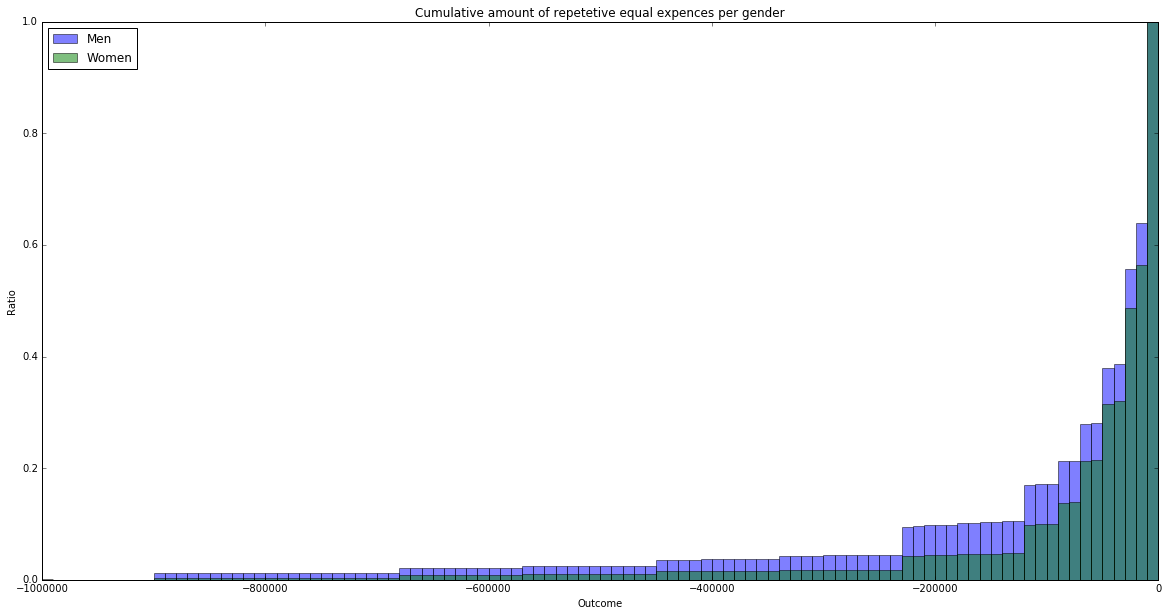

In [165]:
plt.figure(figsize=(20, 10))
plt.hist(customers_gender_train[customers_gender_train['gender'] == 1]['stable_outcome'], \
         range=(-1000000, 0), bins=100, cumulative=True, alpha=0.5, label='Men', normed=True)
plt.hist(customers_gender_train[customers_gender_train['gender'] == 0]['stable_outcome'], \
         range=(-1000000, 0), bins=100, cumulative=True, alpha=0.5, label='Women', normed=True)
plt.legend(loc='upper left')
plt.title('Cumulative amount of repetetive equal expences per gender')
plt.xlabel('Outcome')
plt.ylabel('Ratio')
plt.show()

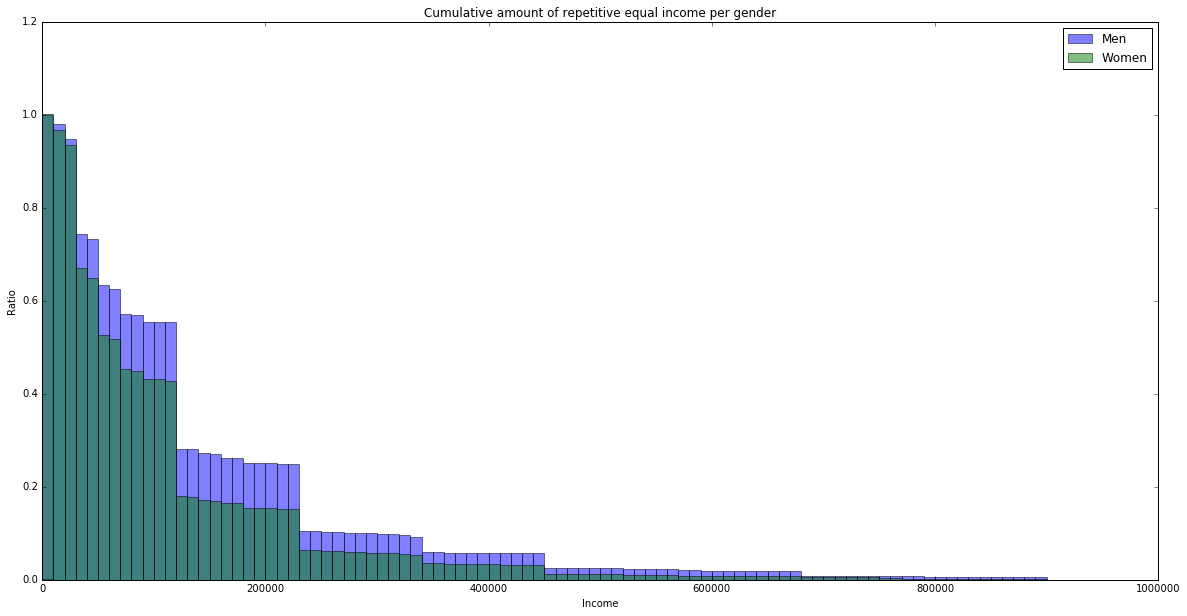

In [166]:
plt.figure(figsize=(20, 10))
non_zero_male = customers_gender_train[(customers_gender_train['stable_income'] > 0) & \
                                       (customers_gender_train['gender'] == 1)]['stable_income']
non_zero_female = customers_gender_train[(customers_gender_train['stable_income'] > 0) & \
                                       (customers_gender_train['gender'] == 0)]['stable_income']
plt.hist(non_zero_male, \
         range=(0, 1000000), bins=100, cumulative=-1, alpha=0.5, label='Men', normed=True)
plt.hist(non_zero_female, \
         range=(0, 1000000), bins=100, cumulative=-1, alpha=0.5, label='Women', normed=True)
plt.legend(loc='upper right')
plt.title('Cumulative amount of repetitive equal income per gender')
plt.xlabel('Income')
plt.ylabel('Ratio')
plt.show()

In [158]:
customers_gender_train['customer_id'].shape

(12000,)